In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

## Without Dropout Layers

In [3]:
X_train = np.linspace(-1, 1, 20)

y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

X_test = np.linspace(-1, 1, 20)

y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

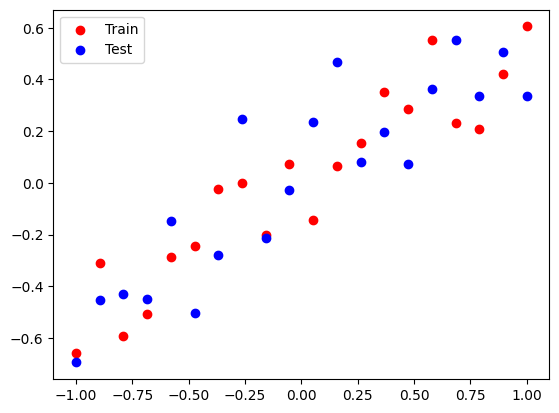

In [4]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

### Regression Model

In [5]:
# build model architecture
model = Sequential()
model.add(Dense(128, input_dim=1, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="linear"))

# define the optimizer
adam = Adam(learning_rate=0.01)

# compile the model
model.compile(loss="mse", optimizer=adam, metrics=["mse"])
# train the model
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), verbose=False)

In [6]:
# evaluate the model
_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse  = model.evaluate(X_test, y_test, verbose=0)

print(f"Train: {train_mse}, Test: {test_mse}")

Train: 0.00469560083001852, Test: 0.04487752169370651


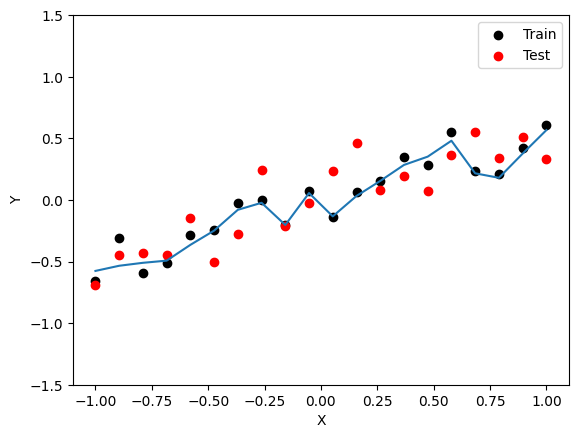

In [8]:
y_pred = model.predict(X_test)

plt.figure()
plt.scatter(X_train, y_train, c="black", label="Train")
plt.scatter(X_test, y_test, c="red", label="Test")
plt.plot(X_test, y_pred)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

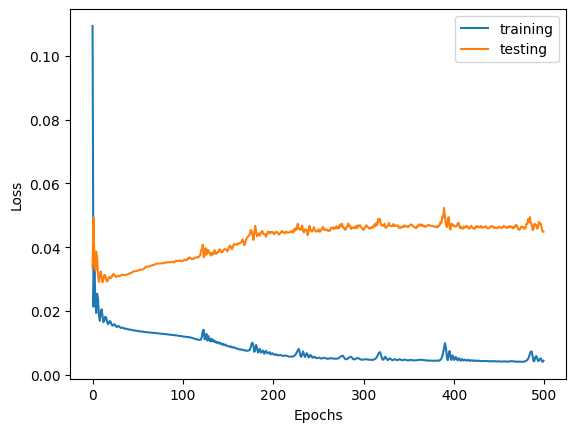

In [10]:
plt.plot(history.history["loss"], label="training")
plt.plot(history.history["val_loss"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Dropout Model

In [12]:
model = Sequential()

model.add(Dense(128, input_dim=1, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="linear"))

adam = Adam(learning_rate=0.01)

model.compile(loss="mse", optimizer=adam, metrics=["mse"])

history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), verbose=False)

In [13]:
# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=False)
test_mse  = model.evaluate(X_test, y_test, verbose=False)

print(f"Train: {train_mse}, Test: {test_mse}")

Train: [0.011299892328679562, 0.011299892328679562], Test: [0.03882283717393875, 0.03882283717393875]


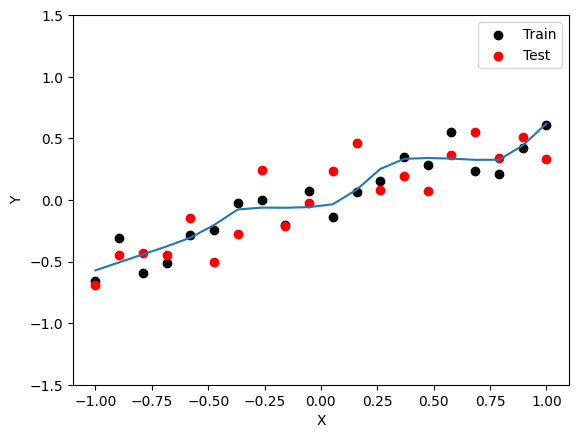

In [14]:
y_pred = model.predict(X_test)

plt.figure()
plt.scatter(X_train, y_train, c="black", label="Train")
plt.scatter(X_test, y_test, c="red", label="Test")
plt.plot(X_test, y_pred)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

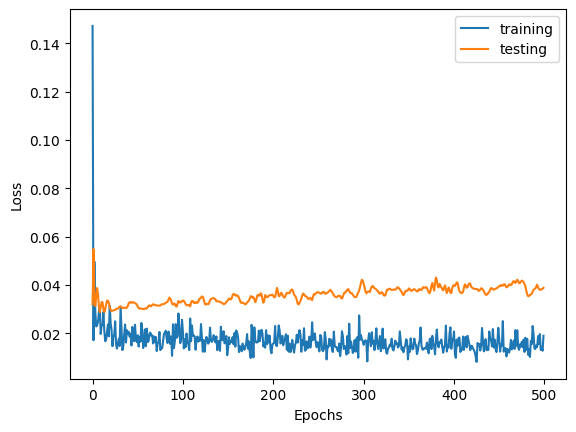

In [15]:
plt.plot(history.history["loss"], label="training")
plt.plot(history.history["val_loss"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()